In [ ]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

scaler = MinMaxScaler()
data = pd.read_csv('data/predict_model_data_0730.csv')

data['metrics'] =  data['pos'] - data['neg']
data['value'] = data['Close']

# window_size = 3 # 窗口大小
# data['metrics'] = data['metrics'].rolling(window_size).mean()



def show_test(data, lag,diff_type):


    
    data['metrics'] = data['metrics'].shift(lag)
    
    # window_size = 3 # 窗口大小
    # data['metrics'] = data['metrics'].rolling(window_size).mean()
    # data[['metrics']]= scaler.fit_transform(data[['metrics']])
    # data['metrics_return'] = data['metrics'].pct_change()
    # data = data[data['metrics_return'] < 9999]

    # data['value_return'] = data['value'].pct_change()
    # data['value_return'] = np.log(data['value']) - np.log(data['value'].shift(1))
    # data = data[data['value_return'] < 9999]


    if diff_type[0] == 'pct_change':
        data[['metrics']]= scaler.fit_transform(data[['metrics']])
        data['metrics_return'] = data['metrics'].pct_change()
    elif diff_type[0] == 'diff':
        data['metrics_return'] = data['metrics'].diff()
    elif diff_type[0] == 'log_return':
        data[['metrics']]= scaler.fit_transform(data[['metrics']])
        data = data[data['metrics']!=0]
        data['metrics_return'] = np.log(data['metrics']) - np.log(data['metrics'].shift(1))

    if diff_type[1] == 'pct_change':
        data['value_return'] = data['value'].pct_change()
    elif diff_type[1] == 'log_return':
        data['value_return'] = np.log(data['value']) - np.log(data['value'].shift(1))
    elif diff_type[1] == 'diff':
        data['value_return'] = data['value'].diff()




    start = '2020-01-02'
    end = '2023-05-30'
    data['date'] = pd.to_datetime(data['date'])
    data = data[(data['date']>= pd.Timestamp(start)) & (data['date'] <= pd.Timestamp(end))]

    # print(data)

    source = 'metrics_return'
    target = 'value_return'

    print(data[source].corr(data[target]))

    # 创建空的列表来存储结果
    results = []

    # print(len(data[source]))

    # 尝试不同的滞后阶数并执行格兰杰因果性分析
    for lag2 in range(1, 10):
        result = grangercausalitytests(data[[target, source]], maxlag=[lag2])
        # result = grangercausalitytests(data[[source, target]], maxlag=[lag])
        # print(result)
        results.append(result[lag2][0]['ssr_ftest'][1])

    # 绘制验证曲线


    # print(min(results))
    lags = np.arange(1, 10)
    

    # print(results)
    return lags, results
    




# result_map = {}

# plt.figure(figsize=(10, 5))
# for lag in range(10):
#     lags, results = show_test(data.copy(), lag, ['pct_change','log_return'])
#     plt.plot(lags, results, marker='o',label=f'lag-{lag}')
#     result_map[lag] = min(results)
# plt.xlabel('Lag Order')
# plt.ylabel('Granger Causality Statistic')
# plt.title('Granger Causality Validation Curve')
# plt.legend()
# plt.show()
# print(result_map)

for diff_type1 in ['pct_change','diff','log_return']:
    for diff_type2 in ['pct_change','diff','log_return']:
        diff_type = []
        diff_type.append(diff_type1)
        diff_type.append(diff_type2)
        result_map = {}
        plt.figure(figsize=(10, 5))
        for lag in range(5):
            lags, results = show_test(data.copy(), lag, diff_type)
            plt.plot(lags, results, marker='o',label=f'lag-{lag}')
            result_map[lag] = min(results)


        plt.xlabel('Lag Order')
        plt.ylabel('Granger Causality Statistic')
        plt.title('Granger Causality Validation Curve')
        plt.legend()
        plt.show()

        print(diff_type, result_map)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

scaler = MinMaxScaler()
data = pd.read_csv('data/predict_model_data.csv')

index = pd.read_csv('data/Fear_and_Greed_Index.csv')

# print(index)

data = pd.merge(data,index,left_on='date',right_on='timestamp')

# print(data['Close'].corr(data['value']))

data['metrics'] =  data['pos'] - data['neg']
# data['metrics'] =  data['value']
data['price'] = data['Close']

# window_size = 3 # 窗口大小
# data['metrics'] = data['metrics'].rolling(window_size).mean()



def show_test(data, lag):


    data[['metrics']]= scaler.fit_transform(data[['metrics']])
    data['metrics'] = data['metrics'].shift(lag)
    
    # window_size = 5 # 窗口大小
    # data['metrics'] = data['metrics'].rolling(window_size).mean()

    data['metrics_return'] = data['metrics'].pct_change()
    data = data[data['metrics_return'] < 9999]
    data['price_return'] = data['price'].pct_change()
    data = data[data['price_return'] < 9999]


    start = '2020-01-02'
    end = '2023-05-30'
    data['date'] = pd.to_datetime(data['date'])
    data = data[(data['date']>= pd.Timestamp(start)) & (data['date'] <= pd.Timestamp(end))]

    # print(data)

    source = 'metrics_return'
    target = 'price_return'

    print(lag, data[source].corr(data[target]))

    # 创建空的列表来存储结果
    results = []

    # print(len(data[source]))

    # 尝试不同的滞后阶数并执行格兰杰因果性分析

    max = 30

    for lag in range(1, max):
        result = grangercausalitytests(data[[target, source]], maxlag=[lag])
        # result = grangercausalitytests(data[[source, target]], maxlag=[lag])
        # print(result)
        results.append(result[lag][0]['ssr_ftest'][1])
        pass

    # 绘制验证曲线


    # print(min(results))
    lags = np.arange(1, max)
    

    # print(results)
    return lags, results
    

plt.figure(figsize=(10, 5))


result_map = {}



for lag in range(10):
    lags, results = show_test(data.copy(), lag)
    plt.plot(lags, results, marker='o',label=f'lag-{lag}')
    result_map[lag] = min(results)


plt.xlabel('Lag Order')
plt.ylabel('Granger Causality Statistic')
plt.title('Granger Causality Validation Curve')
plt.legend()
plt.show()

print(result_map)


C:\Users\67093\AppData\Local\Temp\ipykernel_2576\2409752469.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['metrics_return'] = data['metrics'].pct_change()
C:\Users\67093\AppData\Local\Temp\ipykernel_2576\2409752469.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['value_return'] = data['value'].pct_change()
C:\Users\67093\AppData\Local\Temp\ipykernel_2576\2409752469.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

0.003744699562423999

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0738  , p=0.7860  , df_denom=1240, df_num=1
ssr based chi2 test:   chi2=0.0740  , p=0.7857  , df=1
likelihood ratio test: chi2=0.0740  , p=0.7857  , df=1
parameter F test:         F=0.0738  , p=0.7860  , df_denom=1240, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1532  , p=0.8580  , df_denom=1237, df_num=2
ssr based chi2 test:   chi2=0.3075  , p=0.8575  , df=2
likelihood ratio test: chi2=0.3075  , p=0.8575  , df=2
parameter F test:         F=0.1532  , p=0.8580  , df_denom=1237, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2894  , p=0.8331  , df_denom=1234, df_num=3
ssr based chi2 test:   chi2=0.8730  , p=0.8319  , df=3
likelihood ratio test: chi2=0.8727  , p=0.8320  , df=3
parameter F test:         F=0.2894  , p=0.8331  , df_denom=1234, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:    

ValueError: x contains NaN or inf values.

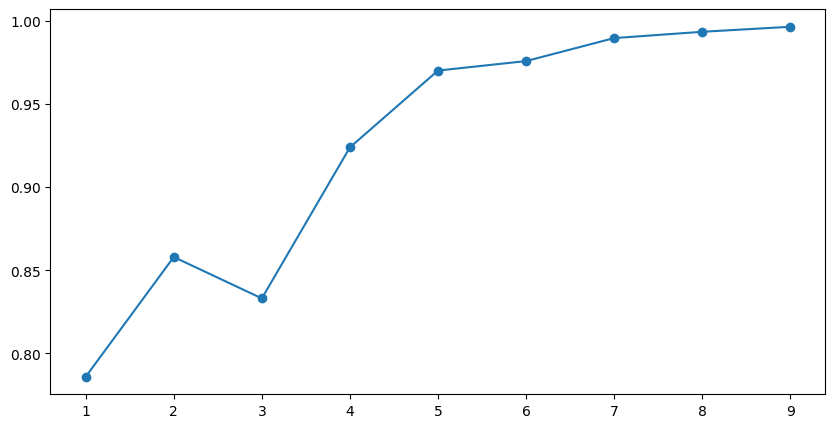

In [2]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

scaler = MinMaxScaler()
data = pd.read_csv('../EmotionModel/combined/sentiment_all_feature.csv')

data['metrics'] =  data['metrics']
data['value'] = data['Close']

# window_size = 3 # 窗口大小
# data['metrics'] = data['metrics'].rolling(window_size).mean()



def show_test(data, lag,diff_type):


    
    data['metrics'] = data['metrics'].shift(lag)
    
    # window_size = 3 # 窗口大小
    # data['metrics'] = data['metrics'].rolling(window_size).mean()
    # data[['metrics']]= scaler.fit_transform(data[['metrics']])
    # data['metrics_return'] = data['metrics'].pct_change()
    # data = data[data['metrics_return'] < 9999]

    # data['value_return'] = data['value'].pct_change()
    # data['value_return'] = np.log(data['value']) - np.log(data['value'].shift(1))
    # data = data[data['value_return'] < 9999]


    if diff_type[0] == 'pct_change':
        data[['metrics']]= scaler.fit_transform(data[['metrics']])
        data = data[data['metrics']!=0]
        data['metrics_return'] = data['metrics'].pct_change()
    elif diff_type[0] == 'diff':
        data['metrics_return'] = data['metrics'].diff()
    elif diff_type[0] == 'log_return':
        data[['metrics']]= scaler.fit_transform(data[['metrics']])
        data = data[data['metrics']!=0]
        data['metrics_return'] = np.log(data['metrics']) - np.log(data['metrics'].shift(1))

    if diff_type[1] == 'pct_change':
        data['value_return'] = data['value'].pct_change()
    elif diff_type[1] == 'log_return':
        data['value_return'] = np.log(data['value']) - np.log(data['value'].shift(1))
    elif diff_type[1] == 'diff':
        data['value_return'] = data['value'].diff()




    start = '2020-01-02'
    end = '2023-05-30'
    data['date'] = pd.to_datetime(data['date'])
    data = data[(data['date']>= pd.Timestamp(start)) & (data['date'] <= pd.Timestamp(end))]

    # print(data)

    source = 'metrics_return'
    target = 'value_return'

    print(data[source].corr(data[target]))

    # 创建空的列表来存储结果
    results = []

    # print(len(data[source]))

    # 尝试不同的滞后阶数并执行格兰杰因果性分析
    for lag2 in range(1, 10):
        result = grangercausalitytests(data[[target, source]], maxlag=[lag2])
        # result = grangercausalitytests(data[[source, target]], maxlag=[lag])
        # print(result)
        results.append(result[lag2][0]['ssr_ftest'][1])

    # 绘制验证曲线


    # print(min(results))
    lags = np.arange(1, 10)
    

    # print(results)
    return lags, results
    




# result_map = {}

# plt.figure(figsize=(10, 5))
# for lag in range(10):
#     lags, results = show_test(data.copy(), lag, ['pct_change','log_return'])
#     plt.plot(lags, results, marker='o',label=f'lag-{lag}')
#     result_map[lag] = min(results)
# plt.xlabel('Lag Order')
# plt.ylabel('Granger Causality Statistic')
# plt.title('Granger Causality Validation Curve')
# plt.legend()
# plt.show()
# print(result_map)

for diff_type1 in ['pct_change']:
    for diff_type2 in ['pct_change']:
        diff_type = []
        diff_type.append(diff_type1)
        diff_type.append(diff_type2)
        result_map = {}
        plt.figure(figsize=(10, 5))
        for lag in range(5):
            lags, results = show_test(data.copy(), lag, diff_type)
            plt.plot(lags, results, marker='o',label=f'lag-{lag}')
            result_map[lag] = min(results)


        plt.xlabel('Lag Order')
        plt.ylabel('Granger Causality Statistic')
        plt.title('Granger Causality Validation Curve')
        plt.legend()
        plt.show()

        print(diff_type, result_map)
